# Homework 4
## 姓名：王宝琪 学号：22210980075

### 1. 读入数据，查看数据基本信息

In [1]:
import numpy as np#导包
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]="SimHei"#中文正常显示

In [2]:
catalog=pd.read_csv("catalogs.csv").astype(str)#读入数据

In [3]:
catalog.head()#查看数据基本信息

,name,first,second,third
0,双汇 猪舌 700g/袋,生鲜,猪牛羊肉,猪肉
1,（满38减10）黑猪腊肉 湘西腊肉 即食小吃食猪肉干肉脯湖南张家界土家 香辣味,生鲜,猪牛羊肉,猪肉
2,精气神 猪肋排段（排骨） 400g/袋 山黑猪 黑猪肉 林间散养,生鲜,猪牛羊肉,猪肉
3,双汇 猪五花肉片 300g/袋 整肉原切 火锅食材,生鲜,猪牛羊肉,猪肉
4,农家散养新鲜现杀黑土猪肉 纯瘦肉 500g,生鲜,猪牛羊肉,猪肉


In [4]:
catalog.info()
print(catalog['first'].unique())
print(catalog['second'].unique())
print(catalog['third'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69494 entries, 0 to 69493
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    69494 non-null  object
 1   first   69494 non-null  object
 2   second  69494 non-null  object
 3   third   69494 non-null  object
dtypes: object(4)
memory usage: 2.1+ MB
['生鲜' '食品饮料、保健食品']
['猪牛羊肉' '饮品甜品' '水果' '蔬菜' '禽肉蛋品' '冷冻食品' '海鲜水产' '饮料冲调' '休闲食品' '食品礼券' '茗茶'
 '粮油调味' '地方特产']
['猪肉' '羊肉' '牛肉' '内脏类' '其他' '冷藏果蔬汁' '冰激凌' '柚子' '香蕉' '苹果' '牛油果' '柠檬' '芒果'
 '梨' '蓝莓' '火龙果' '更多水果' '橙子' '草莓' '叶菜类' '鲜菌菇' '茄果瓜类' '根茎类' '葱姜蒜椒' '半加工蔬菜'
 '鸭肉' '其他禽类' '鸡肉' '蛋类' '速冻半成品' '面点' '火锅丸串' '鱼类' '蟹类' '虾类' '其他水产' '海产礼盒'
 '海产干货' '海参' '贝类' '饮用水' '饮料' '牛奶乳品' '冲饮谷物' '成人奶粉' '休闲零食' '肉干肉脯' '蜜饯果干'
 '坚果炒货' '饼干蛋糕' '粽子' '月饼' '卡券' '大闸蟹' '养生茶' '乌龙茶' '铁观音' '其它茶' '普洱' '绿茶' '龙井'
 '花果茶' '花草茶' '红茶' '黑茶' '白茶' '有机食品' '调味品' '食用油' '南北干货' '米面杂粮' '方便食品' '云南'
 '新疆' '四川' '山西' '其他特产' '内蒙古' '湖南' '福建' '东北' '北京']


读入数据集后，通过head(),info()函数查看了数据的基本信息。可知共有69494件商品,对应的一级品类有“生鲜”，“食品饮料、保健食品”两类，二级品类和三级品类如上所示。

### 2. 使用饼状图对每个一级品类下的各个二级品类的分布情况进行描述性分析

In [5]:
cat_count=catalog.groupby(['first','second']).size()#将数据按照一级品类和二级品类进行分组

cat_count

first      second
生鲜         冷冻食品       1088
           水果         5635
           海鲜水产       4697
           猪牛羊肉       1829
           禽肉蛋品       1920
           蔬菜         5006
           饮品甜品        349
食品饮料、保健食品  休闲食品       6811
           地方特产      12577
           粮油调味      10288
           茗茶        12508
           食品礼券       1921
           饮料冲调       4865
dtype: int64

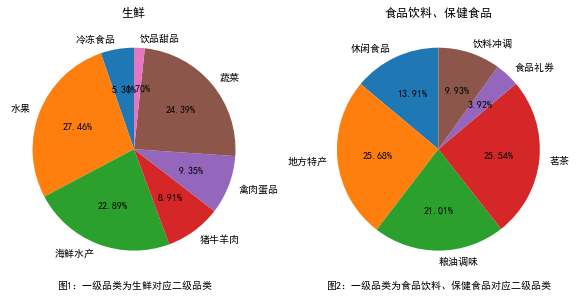

In [6]:
plt.figure(figsize=(10,5))
plt.subplot(121)
cat_count['生鲜'].plot(kind='pie',autopct='%.2f%%',startangle=90)
plt.title('生鲜')
plt.xlabel("图1：一级品类为生鲜对应二级品类")
plt.ylabel("")
plt.subplot(122)
cat_count['食品饮料、保健食品'].plot(kind='pie',autopct='%.2f%%',startangle=90)
plt.title('食品饮料、保健食品')
plt.xlabel("图2：一级品类为食品饮料、保健食品对应二级品类")
plt.ylabel("")                            
plt.show()


每个一级品类对应的二级品类分布情况图如上图所示。其中一级品类为生鲜的商品，二级品类为水果和蔬菜的占比最高，分别为27.46%，24.39%，其次为海鲜水产，可见对于生鲜类商品以新鲜的水果，蔬菜，海鲜为主；一级品类为食品饮料、保健食品的商品，二级品类为地方特产，茗茶的占比最多，分别为25.68%，25.54%，其次为粮油调味，可见对于食品饮料，保健食品大多数商品为土特产等具有地方特色的商品，其次为家用调味品等厨房用品。

### 3.使用分词工具对一级品类为“生鲜”的数据进行分词处理，并绘制词云图

In [7]:
import jieba
from wordcloud import WordCloud

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\86131\AppData\Local\Temp\jieba.cache
Loading model cost 0.579 seconds.
Prefix dict has been built successfully.


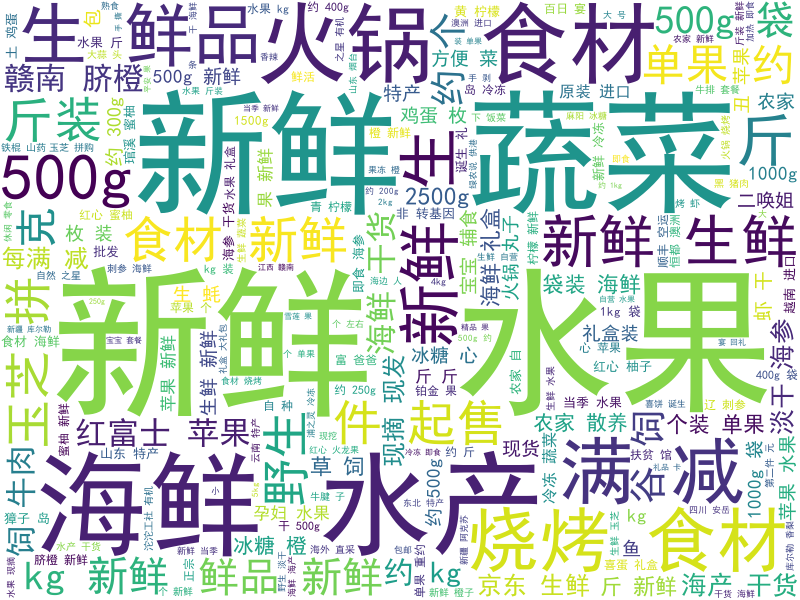

In [8]:
# 筛选出一级品类为生鲜的商品名称
fresh = catalog[catalog['first'] == '生鲜']['name']

# 对商品名称进行分词处理
fresh_word = fresh.apply(lambda x: jieba.cut(x))

# 将分词结果拼接成一个列表
words = []
for word_list in fresh_word:
    words += list(word_list)

# 生成词云图
wordcloud = WordCloud(
    font_path='font/simhei.ttf',  # 设置字体
    background_color='white',  # 设置背景色
    max_words=200,  # 设置最大显示单词数
    width=800,  # 设置图像宽度
    height=600  # 设置图像高度
)
wordcloud.generate_from_text(' '.join(words))
wordcloud.to_image()

一级品类为生鲜的商品名称进行分词处理后得到的词云图如上图所示。可以发现，对于生鲜类商品，其主要特点为新鲜，商品的主要种类为蔬菜，水果，海鲜，水产，与前面绘制的饼图得到的结果一致。所以对于一级品类为生鲜的商品，绝大多数水果，蔬菜，水产海鲜类商品，突出生和鲜。

### 4. 对一级品类为“食品饮料、保健食品”的数据分词结果进行建模前的预处理

In [8]:
import jieba
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [9]:
# 取出一级品类为“食品饮料、保健食品”的数据，并对商品名称进行分词处理
catalog_food = catalog[catalog['first']=='食品饮料、保健食品']
catalog_food['name'] = catalog_food['name'].apply(lambda x: ' '.join(jieba.cut(str(x))))

# 去除停用词，保留高频词
vectorizer = CountVectorizer(stop_words='english', min_df=2,max_features=1000)
X = vectorizer.fit_transform(catalog_food['name'])

# 划分训练集和测试集
y = catalog_food['second']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 打印处理后的矩阵信息
print(f"Dimension of term-document matrix: {X.shape}")
print(f"Dimension of training set term-document matrix: {X_train.shape}")
print(f"Dimension of test set term-document matrix: {X_test.shape}")

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\86131\AppData\Local\Temp\jieba.cache
Loading model cost 0.554 seconds.
Prefix dict has been built successfully.
C:\Users\86131\AppData\Local\Temp\ipykernel_2936\3758202584.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catalog_food['name'] = catalog_food['name'].apply(lambda x: ' '.join(jieba.cut(str(x))))


Dimension of term-document matrix: (48970, 1000)
Dimension of training set term-document matrix: (39176, 1000)
Dimension of test set term-document matrix: (9794, 1000)


对于建模前的预处理，首先取出一级品类为“食品饮料、保健食品”的数据，对商品名称使用jieba.cut函数进行分词处理，并且我参考代码课上的内容，去除了停用词，数字字母等无意义词汇，保留了top1000的高频词。随后以8：2的方式划分训练集和测试集，并建立了文档-词频矩阵，输出的矩阵维度信息如上所示。

### 5. 将上一步预处理后的数据按照8：2的方式划分训练集和测试集，在训练集上建立朴素贝叶斯模型并在测试集上评估模型效果

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [11]:
# 训练模型
nb = MultinomialNB()
nb.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = nb.predict(X_test)

# 输出模型效果评估结果
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        休闲食品       0.82      0.85      0.83      1407
        地方特产       0.79      0.76      0.77      2435
        粮油调味       0.83      0.82      0.82      2043
          茗茶       0.95      0.95      0.95      2547
        食品礼券       0.82      0.94      0.88       376
        饮料冲调       0.91      0.96      0.94       986

    accuracy                           0.86      9794
   macro avg       0.85      0.88      0.87      9794
weighted avg       0.86      0.86      0.86      9794



调用函数MultinomialNB()在训练集上搭建朴素贝叶斯模型，并在测试集上进行预测。输出的混淆矩阵如上所示，最终得到的预测准确度为86%。该模型的分类精度确实没有达到特别高，但是可以基本完成分类目的。对于一级品类为“食品饮料、保健食品”的各商品，其二级品类为茗茶和饮料冲调的precision和recall要高于其他，可能的原因是茗茶和饮料冲调类商品是最能体现，突出“食品饮料、保健食品”特点的商品，因此其分类效果比较好。

### 6. 尝试改变参数，再次建模并进行对比

In [34]:
# 更改处理高频词和低频词的阈值
vectorizer = CountVectorizer(min_df=50, max_df=0.8,max_features=1500)  # 最小词频设置为5，最大词频占比设置为0.8
X = vectorizer.fit_transform(catalog_food['name'])

# 划分训练集和测试集
y = catalog_food['second']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
# 训练模型
nb = MultinomialNB()
nb.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = nb.predict(X_test)

# 输出模型效果评估结果
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        休闲食品       0.83      0.86      0.84      1407
        地方特产       0.81      0.77      0.79      2435
        粮油调味       0.84      0.84      0.84      2043
          茗茶       0.96      0.95      0.96      2547
        食品礼券       0.84      0.96      0.89       376
        饮料冲调       0.92      0.97      0.94       986

    accuracy                           0.87      9794
   macro avg       0.87      0.89      0.88      9794
weighted avg       0.87      0.87      0.87      9794



我经过调整参数，将最小词频设置为5，最大词频占比设置为0.8，最大特征数改为1500，得到的模型结果比之前略好，accuracy，precision，recall略有提高。模型还有待进一步完善。